# VGG16 based CNN Model in TENSORFLOW

In [ ]:
#importing the data loader func made in tensorflow
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Sagnik_B21320_DL_Assgn

%run 2a(TF).ipynb

In [ ]:
# reshaping dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
#relevant libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#defining the VGG16 cnn model
model=keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

The above code is a modification of the traditional VGG16 architecture to resolve the issue of negative dimensioning.

In [ ]:
model.summary()

#training in batches of 64
model.fit(train_images, train_labels, epochs=4, batch_size=64, validation_data=(test_images, test_labels))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

313/313 [==============================] - 6s 18ms/step


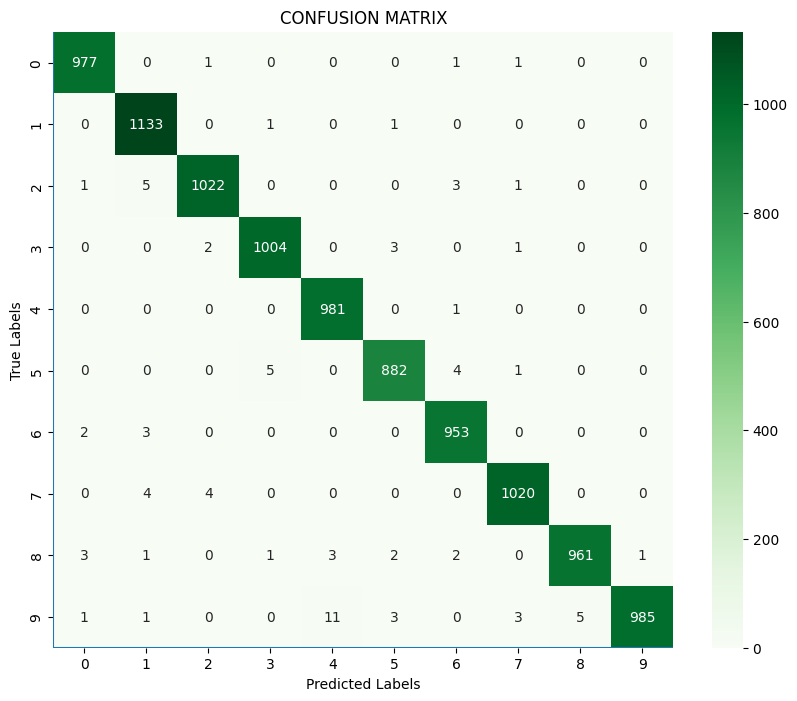

In [ ]:
#visualizing the summary
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

#conf matrix
cm = confusion_matrix(test_labels, predicted_labels)

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CONFUSION MATRIX')
plt.axhline(10)
plt.axvline(0)
plt.show()